# Expressibility of the embedding circuit

Expressibility $\epsilon_{\mathbb{U}}^{(X)}$ is defined by

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(X)} &:= \|A^{(t)}(X)\| \\
    \mathcal{A}_{\mathbb{U}_x}^{(t)}(X) &:= \int_{\mathcal{U}(d)} d\mu_{\text{Haar}}(V)\,V^{\otimes t}X^{\otimes t}(V^{\otimes t})^\dagger - \int_{\mathbb{U}_x} dU\,U^{\otimes t}X^{\otimes t}(U^{\otimes t})^\dagger
\end{aligned}.


The norm in the definition of $\epsilon_{\mathbb{U}}^{(X)}$ can be Schatten $p$-normm, or diamond norm.

Especiallly, when Schatten $2$-norm is used, the expressibility is redefined by frame potential as follows:

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(X)} &:= \sqrt{\mathcal{F}_{\mathbb{U}}^{(2)}(X) - \mathcal{F}_{Haar}^{(2)}(X) }\\
    \mathcal{F}_{\mathbb{U}}^{(2)}(X) &:= \int_{U\in\mathbb{U}}\int_{V\in\mathbb{U}} dUdV \operatorname{Tr}[XW^\dagger VX^\dagger V^\dagger W].
\end{aligned}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

import warnings
warnings.filterwarnings('ignore')

In [3]:
def analytical(s,n):
    return (2**s - 2**(-s))/(2**n + 1)

def analytical_haar_frame_potential(nqubits):
        return 1/(2**(nqubits-1) * (2**nqubits + 1))

class EXPRESSIBILITY:
    def __init__(self, nqubits, nlayers, nsamples):
        self.nqubits = nqubits
        self.nlayers = nlayers
        self.nsamples = nsamples

    def HEE(self, circuit, params):
        for i in range(self.nqubits):
            circuit.rx(params[i], i)
            circuit.ry(params[i + self.nqubits], i)
        for i in range(self.nqubits - 1):
            circuit.cx(i, i+1)

    def generate_circuit_state(self, params):
        circuit = QuantumCircuit(self.nqubits)

        for i in range(self.nlayers):
            self.HEE(circuit, params[ 2*self.nqubits*i : 2*self.nqubits*(i+1) ])

        state = qi.Statevector.from_instruction(circuit)
        return state

    def make_random_params(self):
        params = np.random.uniform(0, 2*np.pi, 2*self.nqubits*self.nlayers)
        return params

    def random_inner_product(self):
        params1 = self.make_random_params()
        state1 = self.generate_circuit_state(params1)
        params2 = self.make_random_params()
        state2 = self.generate_circuit_state(params2)

        return np.abs(state1.inner(state2))

    def circuit_frame_potential(self):
        samples = []
        for _ in range(self.nsamples):
            samples.append(self.random_inner_product()**4)
        return np.mean(samples)

    def expressibility(self):
        circuit_frame_potential_ = self.circuit_frame_potential()
        analytical_haar_frame_potential_ = analytical_haar_frame_potential(self.nqubits)

        expressibility_ = (circuit_frame_potential_ - analytical_haar_frame_potential_)**0.5
        return expressibility_

In [4]:
nqubits_list = np.arange(2, 7)
nlayers_list = [1,2,3,4,5,6]
nsamples = 10**3

samples_each_nqubits = []
for nqubits in nqubits_list:
    samples_each_nlayers = []
    for nlayers in nlayers_list:
        exp = EXPRESSIBILITY(nqubits, nlayers, nsamples)
        samples_each_nlayers.append(exp.circuit_frame_potential())
    samples_each_nqubits.append(samples_each_nlayers)

In [5]:
analytical_samples_each_nqubits = []
for nqubits in nqubits_list:
    analytical_samples_each_nlayers = []
    for nlayers in nlayers_list:
        analytical_samples_each_nlayers.append(analytical_haar_frame_potential(nqubits))
    analytical_samples_each_nqubits.append(analytical_samples_each_nlayers)

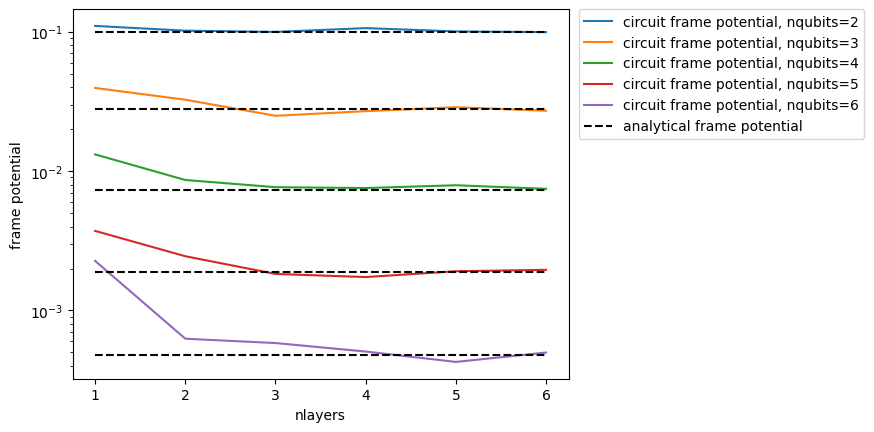

In [7]:
for i in range(len(nqubits_list)):
    plt.semilogy(nlayers_list, samples_each_nqubits[i], label=f'circuit frame potential, nqubits={nqubits_list[i]}')

for i in range(len(nqubits_list)-1):
    plt.semilogy(nlayers_list, analytical_samples_each_nqubits[i], linestyle='dashed', color='black')
plt.semilogy(nlayers_list, analytical_samples_each_nqubits[-1], label=f'analytical frame potential', linestyle='dashed', color='black')

plt.xlabel('nlayers')
plt.ylabel('frame potential')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

In [8]:
samples_each_nlayers_ = np.array(samples_each_nqubits).T

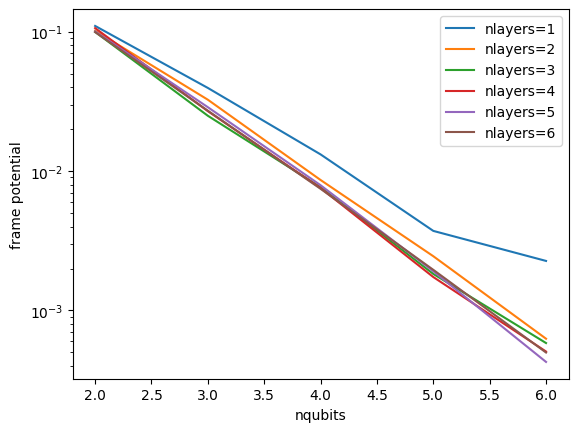

In [9]:
for i in range(len(nlayers_list)):
    plt.semilogy(nqubits_list, samples_each_nlayers_[i], label=f'nlayers={nlayers_list[i]}')
plt.xlabel('nqubits')
plt.ylabel('frame potential')
plt.legend()
plt.show()